In [219]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

# Wrangling data


## Gathering data

In [220]:
unemployment = pd.read_csv("C:\\Users\\Al-arab\\Desktop\\COGNORISE\\Unemployment in India.csv")

In [221]:
unemploymentrate = pd.read_csv("C:\\Users\\Al-arab\\Desktop\\COGNORISE\\Unemployment_Rate_upto_11_2020.csv")

## Assessing data

In [222]:
unemployment.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

<Axes: >

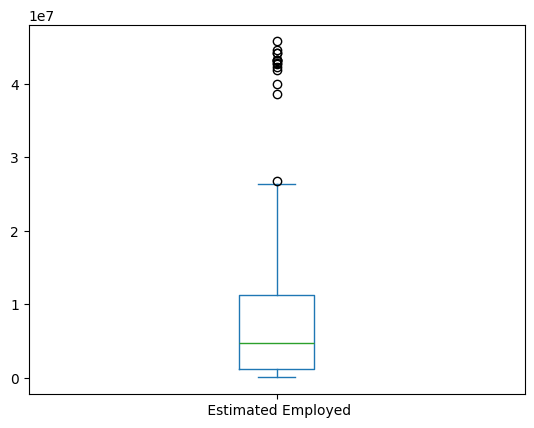

In [223]:
unemployment[" Estimated Employed"].plot(kind = "box")

In [224]:
unemployment['Estimated unemployed'].plot(kind = "box")

KeyError: 'Estimated unemployed'

In [ ]:
unemployment.sample()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,Estimated Labour unParticipation Rate (%),Estimated Employed rate,Estimated unemployed
748,West Bengal,2020-01-31,Monthly,7.27,11208617.0,45.39,Urban,54.61,92.73,878751


In [ ]:
unemployment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 740 entries, 0 to 753
Data columns (total 10 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   Region                                     740 non-null    object        
 1    Date                                      740 non-null    datetime64[ns]
 2    Frequency                                 740 non-null    object        
 3    Estimated Unemployment Rate (%)           740 non-null    float64       
 4    Estimated Employed                        740 non-null    float64       
 5    Estimated Labour Participation Rate (%)   740 non-null    float64       
 6   Area                                       740 non-null    object        
 7   Estimated Labour unParticipation Rate (%)  740 non-null    float64       
 8   Estimated Employed rate                    740 non-null    float64       
 9   Estimated unemployed 

In [ ]:
unemploymentrate.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
264,West Bengal,31-08-2020,M,14.87,33298644,47.48,East,22.9868,87.855
265,West Bengal,30-09-2020,M,9.35,35707239,47.73,East,22.9868,87.855
266,West Bengal,31-10-2020,M,9.98,33962549,45.63,East,22.9868,87.855


In [ ]:
unemploymentrate.describe()

In [ ]:
unemploymentrate.tail(3)

In [ ]:
unemployment.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,Estimated Labour unParticipation Rate (%),Estimated Employed rate,Estimated unemployed
751,West Bengal,2020-04-30,Monthly,15.63,9299466.0,41.20,Urban,58.80,84.37,1722776
752,West Bengal,2020-05-31,Monthly,15.22,9240903.0,40.67,Urban,59.33,84.78,1658958
753,West Bengal,2020-06-30,Monthly,9.86,9088931.0,37.57,Urban,62.43,90.14,994196


In [ ]:
unemployment.describe()

In [ ]:
unemployment.tail(3)

## Cleaning data

In [ ]:
unemploymentrate.isna().sum().sum()

0

In [ ]:
unemploymentrate.dropna(inplace=True)

In [ ]:
unemploymentrate.size

In [ ]:
unemploymentrate.duplicated().sum()

In [ ]:
unemployment.isna().sum().sum()

0

In [ ]:
unemployment.dropna(inplace=True)

In [ ]:
unemployment.size

In [ ]:
unemployment.duplicated().sum()

In [ ]:
unemployment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 740 entries, 0 to 753
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 46.2+ KB


In [ ]:
unemployment[" Date"] = pd.to_datetime(unemployment[" Date"])

In [ ]:
unemployment.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area', 'Estimated Labour unParticipation Rate (%)',
       'Estimated Employed rate', 'Estimated unemployed'],
      dtype='object')

# Analysing and visualizing

- by knowing the percentage of Estimated Unemployment Rate (%)	we can know the percentage of Estimated Employed rate
- we can know number of Estimated Unemployment 
- as we know that Estimated Labour Participation Rate (%) = labour force participation rate by dividing the number of people actively participating in the labour force by the total number of people eligible to participate in the labor force force we can know Estimated Labour unParticipation Rate (%)
- we can get some different regions and comparing and find some graphs 

In [ ]:
unemployment["Estimated Labour unParticipation Rate (%)"] = 100 - unemployment[" Estimated Labour Participation Rate (%)"]

In [ ]:
# by knowing the percentage of Estimated Unemployment Rate (%)	we can know the percentage of Estimated Employed rate
unemployment["Estimated Employed rate"] = 100 - unemployment[" Estimated Unemployment Rate (%)"]

In [ ]:
# we can know number of Estimated Unemployment
unemployment["Estimated unemployed"] = unemployment[" Estimated Employed"] / unemployment['Estimated Employed rate'] * unemployment[" Estimated Unemployment Rate (%)"]
unemployment["Estimated unemployed"] = unemployment["Estimated unemployed"].astype(int)

In [ ]:
unemployment.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area', 'Estimated Labour unParticipation Rate (%)',
       'Estimated Employed rate', 'Estimated unemployed'],
      dtype='object')

Text(0, 0.5, 'Estimated employed')

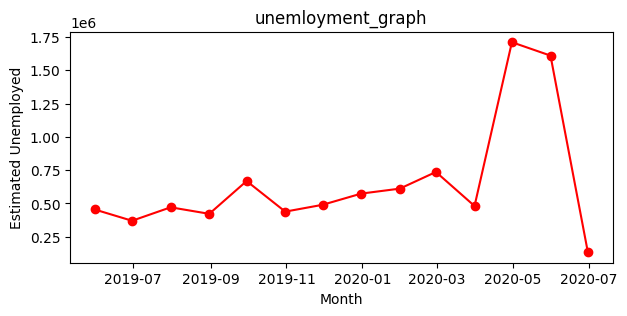

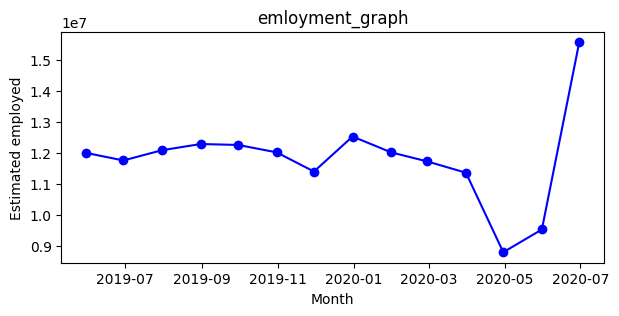

In [ ]:
date_unemployed = unemployment.groupby(unemployment[" Date"])["Estimated unemployed"].first()
plt.figure(figsize=(7 , 3))
plt.plot(date_unemployed.index, date_unemployed.values, marker='o', linestyle='-', color='red')

# Adding titles and labels
plt.title("unemloyment_graph")
plt.xlabel("Month")
plt.ylabel("Estimated Unemployed")
#--------------------------------------------------------------------------------------------------------------------

In [ ]:
date_unemployedlabour = unemployment.groupby(unemployment[" Date"])[" Estimated Employed"].first()
plt.figure(figsize=(7 , 3))
plt.plot(date_unemployedlabour.index, date_unemployedlabour.values, marker='o', linestyle='-', color='b')

# Adding titles and labels
plt.title("emloyment_graph")
plt.xlabel("Month")
plt.ylabel("Estimated employed")

Text(0, 0.5, 'Estimated employed')

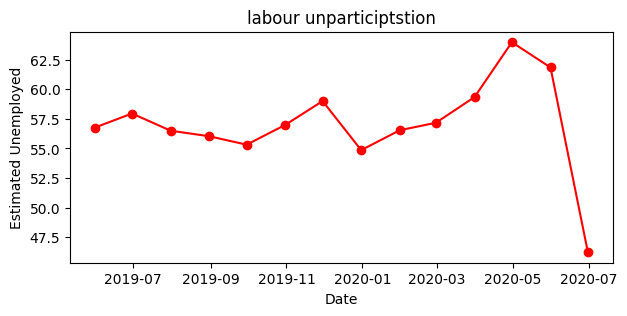

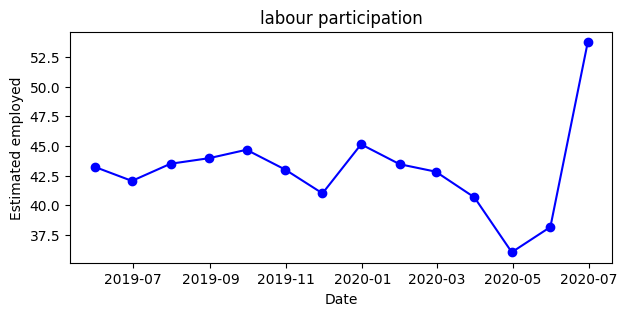

In [ ]:
date_unemployed = unemployment.groupby(unemployment[" Date"])["Estimated Labour unParticipation Rate (%)"].first()
plt.figure(figsize=(7 , 3))
plt.plot(date_unemployed.index, date_unemployed.values, marker='o', linestyle='-', color='red')

# Adding titles and labels
plt.title("labour unparticiptstion")
plt.xlabel("Date")
plt.ylabel("unlabour participtatoon")
#--------------------------------------------------------------------------------------------------------------------

In [ ]:
date_unemployedlabour = unemployment.groupby(unemployment[" Date"])[" Estimated Labour Participation Rate (%)"].first()
plt.figure(figsize=(7 , 3))
plt.plot(date_unemployedlabour.index, date_unemployedlabour.values, marker='o', linestyle='-', color='b')

# Adding titles and labels
plt.title("labour participation")
plt.xlabel("Date")
plt.ylabel("labour participtation")

In [ ]:
unemployment.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area', 'Estimated Labour unParticipation Rate (%)',
       'Estimated Employed rate', 'Estimated unemployed'],
      dtype='object')

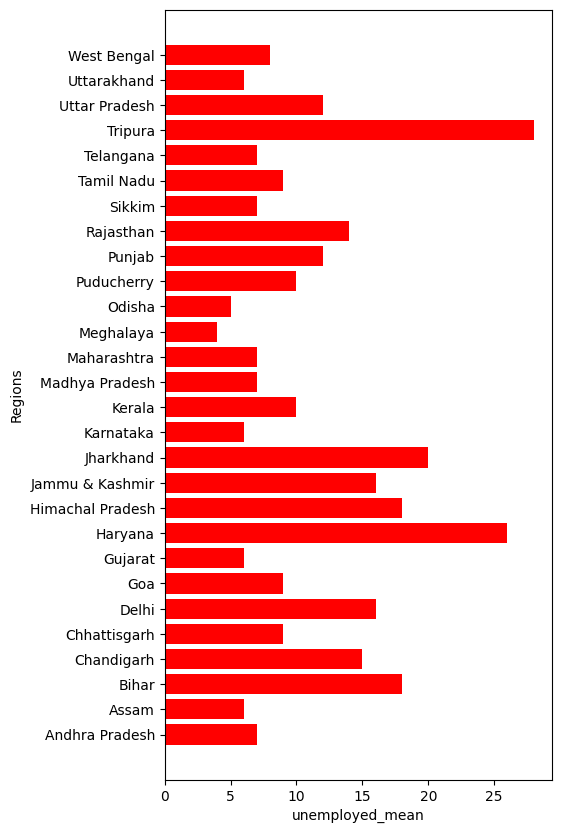

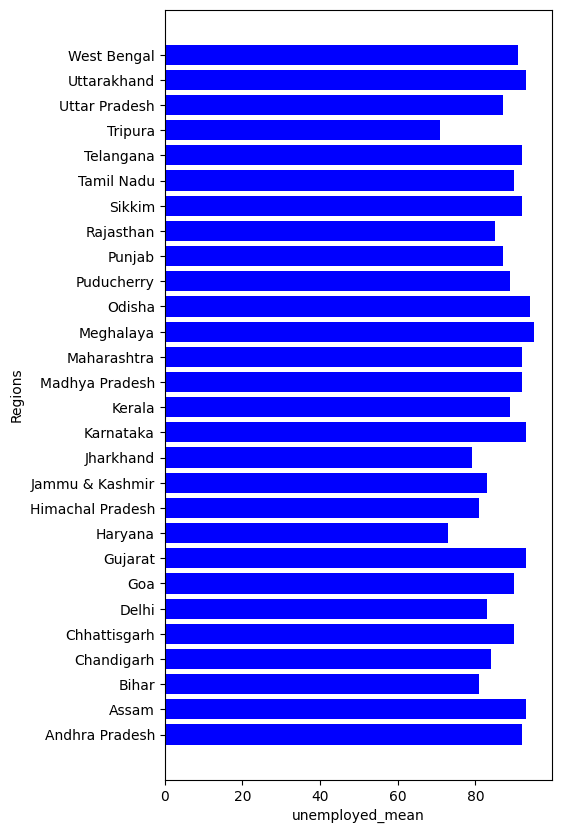

In [ ]:
unemployed_regions = unemployment.groupby(unemployment["Region"])[" Estimated Unemployment Rate (%)"].mean().astype(int)
plt.figure(figsize=(5 , 10))
plt.barh(unemployed_regions.index , unemployed_regions.values , color = "red")
plt.xlabel("unemployed_mean")
plt.ylabel("Regions")
plt.show()
#--------------------------------------------


In [ ]:
unemployed_regions = unemployment.groupby(unemployment["Region"])["Estimated Employed rate"].mean().astype(int)
plt.figure(figsize=(5 , 10))
plt.barh(unemployed_regions.index , unemployed_regions.values , color = "blue")
plt.xlabel("employed_mean")
plt.ylabel("Regions")
plt.show()

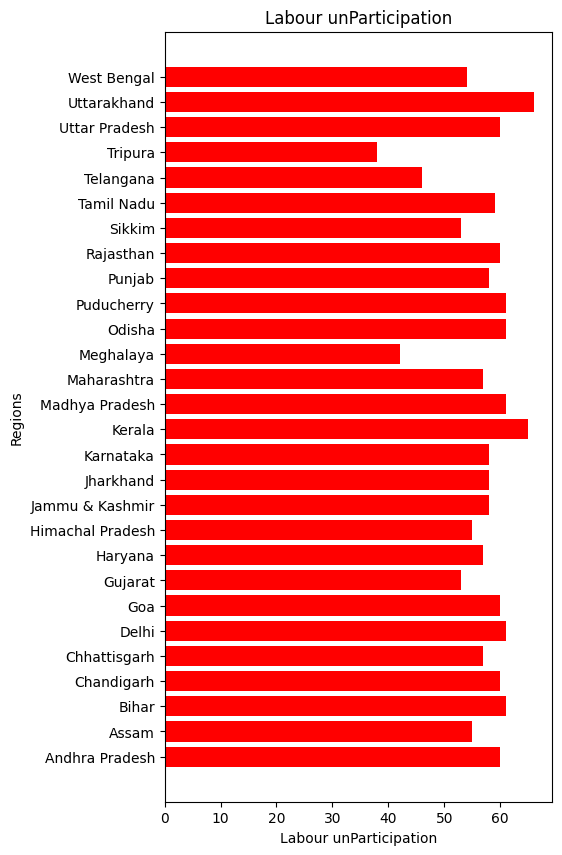

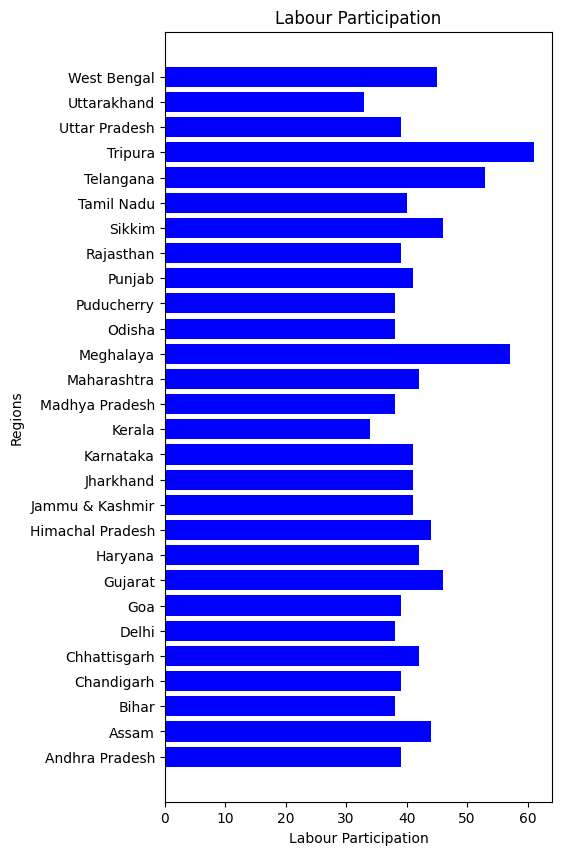

In [ ]:
unemployed_regions = unemployment.groupby(unemployment["Region"])["Estimated Labour unParticipation Rate (%)"].mean().astype(int)
plt.figure(figsize=(5 , 10))
plt.barh(unemployed_regions.index , unemployed_regions.values , color = "red")
plt.xlabel("Labour unParticipation")
plt.ylabel("Regions")
plt.title("Labour unParticipation")
plt.show()


In [ ]:
#--------------------------------------------
unemployed_regions = unemployment.groupby(unemployment["Region"])[" Estimated Labour Participation Rate (%)"].mean().astype(int)
plt.figure(figsize=(5 , 10))
plt.barh(unemployed_regions.index , unemployed_regions.values , color = "blue")
plt.xlabel("Labour Participation")
plt.ylabel("Regions")
plt.title("Labour Participation")
plt.show()